In [1]:
import pandas as pd             # Importing pandas library for data manipulation and analysis
import numpy as np              # Importing numpy library for numerical operations
import matplotlib.pyplot as plt # Importing matplotlib library for data visualization
import seaborn as sns           # Importing seaborn library for statistical data visualization

plt.style.use('ggplot')         # Setting the plot style to 'ggplot' for aesthetic purposes
import nltk                     # Importing nltk library for natural language processing tasks

In [2]:
# Reading the Data from the specified file path
df = pd.read_csv("C:\\Users\\naimu\\Music\\Sentiment analysis NLP & ML\\All Detaset\\Sentiment Analysis of Food Reviews\\amazon_reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Taking only 5000 records considering local machine capacity
df = df.head(5000)

In [5]:
df['Text'].values[0]  # Accessing the value of the first entry in the 'Text' column of the DataFrame

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(5000, 10)

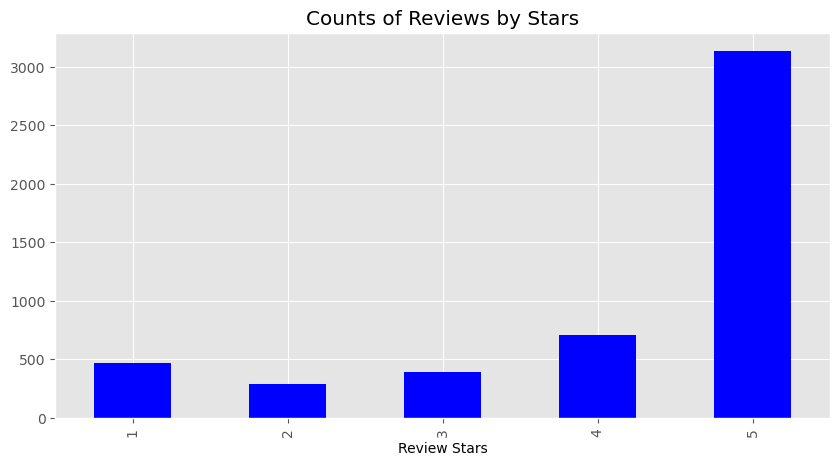

In [7]:
# Plotting the counts of reviews by stars with customized color
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Counts of Reviews by Stars',
                                                  figsize=(10, 5),
                                                  color='blue')  # Changing the color to blue
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
#NLTK (Natural Language Toolkit)

In [9]:
example = df['Text'][40]  # Accessing the text at index 50 in the 'Text' column
print(example)  # Printing the text

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


In [10]:
tokens = nltk.word_tokenize(example)  # Tokenizing the text using nltk
tokens[:10]  # Displaying the first 10 tokens

['The', 'variety', 'packs', 'taste', 'great', '!', '<', 'br', '/', '>']

In [11]:
tagged = nltk.pos_tag(tokens)  # Performing part-of-speech tagging on the tokens
tagged[:10]  # Displaying the first 10 tagged tokens

[('The', 'DT'),
 ('variety', 'NN'),
 ('packs', 'VBZ'),
 ('taste', 'NN'),
 ('great', 'JJ'),
 ('!', '.'),
 ('<', 'JJ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP')]

In [12]:
entities = nltk.chunk.ne_chunk(tagged)  # Performing named entity recognition (NER) using NLTK's ne_chunk function
entities.pprint()  # Pretty-printing the named entities extracted from the text

(S
  The/DT
  variety/NN
  packs/VBZ
  taste/NN
  great/JJ
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  have/VBP
  them/PRP
  every/DT
  morning/NN
  ./.
  At/IN
  $/$
  0.30/CD
  cents/NNS
  per/IN
  meal/NN
  ,/,
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  why/WRB
  everyone/NN
  on/IN
  earth/NN
  is/VBZ
  n't/RB
  buying/VBG
  this/DT
  stuff/NN
  up./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Maple/NNP
  and/CC
  brown/JJ
  sugar/NN
  is/VBZ
  terrific/JJ
  ,/,
  followed/VBN
  by/IN
  apples/NNS
  and/CC
  cinnamon/NN
  ,/,
  followed/VBN
  by/IN
  regular/JJ
  ./.
  You/PRP
  do/VBP
  n't/RB
  get/VB
  tired/VBN
  of/IN
  the/DT
  same/JJ
  ole/JJ
  thing/NN
  ,/,
  and/CC
  they/PRP
  taste/VBP
  great./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  just/RB
  boil/VBP
  water/NN
  from/IN
  a/DT
  small/JJ
  pot/NN
  ,/,
  empty/VBP
  the/DT
  packet/NN
  or/CC
  2/CD
  in/IN
  a/DT
  bowl/

In [13]:
# Vader Sentiment Scoring

In [14]:
nltk.download('vader_lexicon')  # Downloading the VADER lexicon for sentiment analysis using NLTK

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\naimu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer  # Importing the SentimentIntensityAnalyzer class from NLTK's sentiment module
from tqdm.notebook import tqdm  # Importing tqdm for displaying progress bars

sia = SentimentIntensityAnalyzer()  # Initializing the SentimentIntensityAnalyzer

In [16]:
sia

In [17]:
sia.polarity_scores('I am so nervous')  # Analyzing the sentiment polarity scores of the given text

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.3384}

In [18]:
sia.polarity_scores('I am so happy')  # Analyzing the sentiment polarity scores of the given text

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores(example)

{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [20]:
# Running the polarity score on the whole dataset
results = {}  # Initializing an empty dictionary to store the results
for i, row in tqdm(df.iterrows(), total=len(df)):  # Iterating over each row in the DataFrame
    text = row['Text']  # Extracting the text from the current row
    myid = row['Id']    # Extracting the ID from the current row
    results[myid] = sia.polarity_scores(text)  # Calculating sentiment polarity scores and storing them in the dictionary

  0%|          | 0/5000 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(results)  # Creating a pandas DataFrame from the results dictionary

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.1150,0.0000,0.080,0.0250,0.0260,0.0970,0.1540,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.5650,0.8180,0.8480,0.6790,0.692,0.8830,0.7640,0.8270,0.6370,0.7170
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.4350,0.1820,0.0370,0.3210,0.228,0.0920,0.2100,0.0760,0.2090,0.2830
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9531,0.7177,-0.8264,0.9693,0.792,0.7193,0.9846,-0.0554,0.9078,0.9923


In [22]:
vaders = pd.DataFrame(results).T

In [23]:
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [24]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  # Resetting the index and renaming the column to 'Id'
vaders = vaders.merge(df, how='left')  # Merging the sentiment score DataFrame with the main dataset using the 'Id' column
# Now we will have sentiment score merged with the main dataset

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


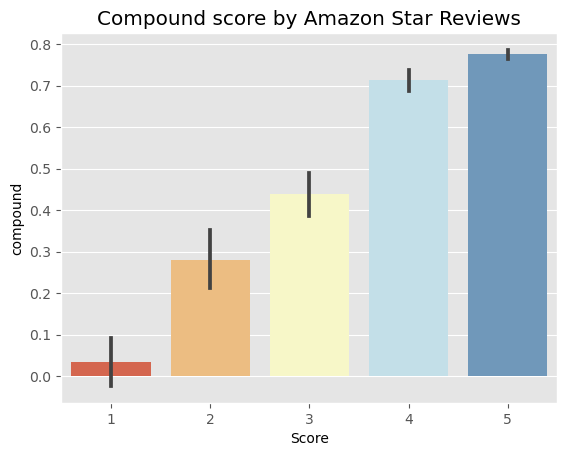

In [26]:
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='RdYlBu')  # Creating a bar plot using seaborn with a custom color palette
ax.set_title('Compound score by Amazon Star Reviews')  # Setting the title of the plot
plt.show()  # Displaying the plot

<Axes: xlabel='Score', ylabel='pos'>

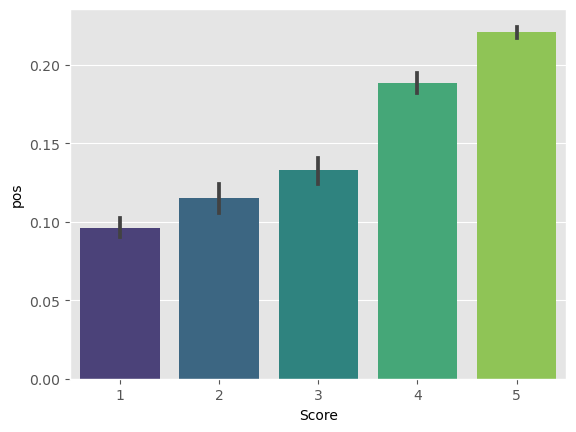

In [27]:
sns.barplot(data=vaders, x='Score', y='pos', palette='viridis')  # Creating a bar plot using seaborn with a custom color palette

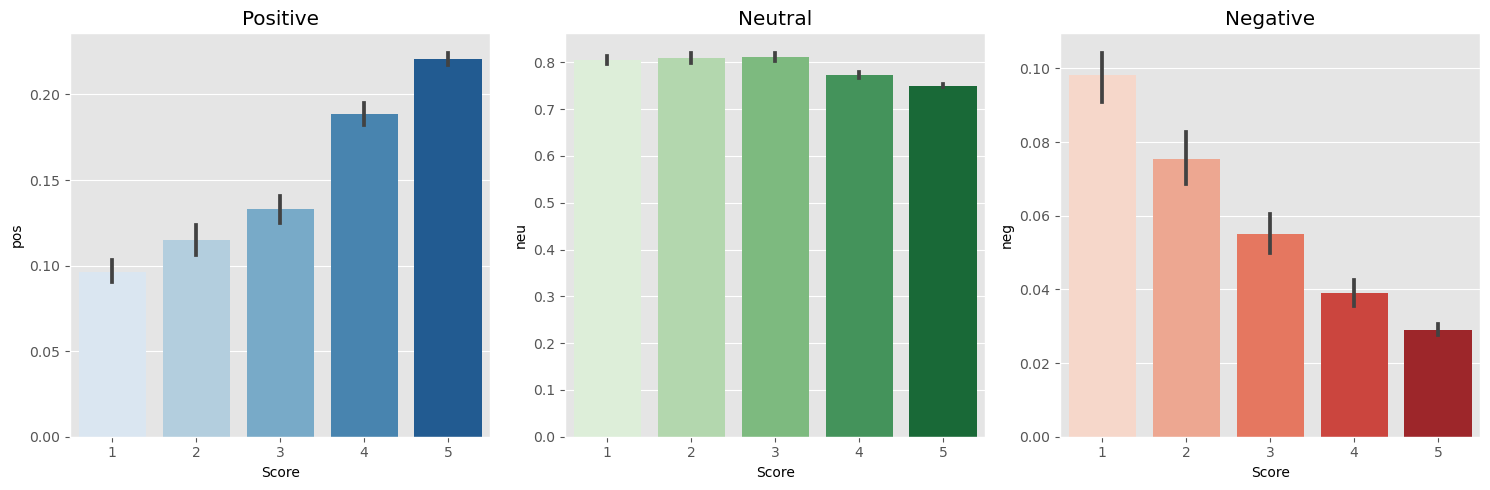

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Creating subplots with 1 row and 3 columns

# Creating bar plots for positive, neutral, and negative sentiments with different colors
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette='Blues')  # Positive sentiment
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette='Greens')  # Neutral sentiment
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette='Reds')  # Negative sentiment

# Setting titles for each subplot
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show()  # Displaying the plot

In [29]:
# Roberta Pretrained Model

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Importing necessary classes from the transformers library
from scipy.special import softmax  # Importing softmax function from scipy.special

In [31]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"  # Pre-trained model name
tokenizer = AutoTokenizer.from_pretrained(MODEL)  # Initializing tokenizer with the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)  # Initializing model for sequence classification

In [32]:
# Printing the example text
print(example)

# Performing sentiment analysis using VADER sentiment analyzer and printing the polarity scores
sia.polarity_scores(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [33]:
# Run Roberta Model

# Tokenizing the example text using the tokenizer and returning tensors
encoded_text = tokenizer(example, return_tensors='pt')

# Passing the encoded text through the model
output = model(**encoded_text)

# Detaching the tensor from the computation graph and converting it to a numpy array
scores = output[0][0].detach().numpy()

# Applying softmax to get probabilities for each sentiment class
scores = softmax(scores)

# Storing the scores in a dictionary
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

# Printing the sentiment scores
print(scores_dict)

{'roberta_neg': 0.009690555, 'roberta_neu': 0.037833188, 'roberta_pos': 0.95247626}


In [34]:
def polarity_scores_roberta(example):
    """
    Calculate sentiment polarity scores using the pre-trained RoBERTa model.

    Args:
    - example (str): Input text for sentiment analysis.

    Returns:
    - scores_dict (dict): Dictionary containing sentiment polarity scores.
    """
    # Tokenizing the example text using the tokenizer and returning tensors
    encoded_text = tokenizer(example, return_tensors='pt')
    
    # Passing the encoded text through the model
    output = model(**encoded_text)
    
    # Detaching the tensor from the computation graph and converting it to a numpy array
    scores = output[0][0].detach().numpy()
    
    # Applying softmax to get probabilities for each sentiment class
    scores = softmax(scores)

    # Storing the scores in a dictionary
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [ ]:
results = {}  # Initializing an empty dictionary to store the results
for i, row in tqdm(df.iterrows(), total=len(df)):  # Iterating over each row in the DataFrame
    try:
        text = row['Text']  # Extracting the text from the current row
        myid = row['Id']    # Extracting the ID from the current row
        
        # Performing sentiment analysis using VADER
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        
        # Renaming keys in the VADER result dictionary
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Performing sentiment analysis using RoBERTa
        roberta_results = polarity_scores_roberta(text)

        # Combining VADER and RoBERTa results into a single dictionary
        both = {**vader_result_rename, **roberta_results}
        results[myid] = both  # Storing the combined results in the dictionary
    except RuntimeError:
        print(f"Broke for id {myid}")  # Handling runtime errors

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(results).T  # Creating a DataFrame from the results dictionary and transposing it
results_df = results_df.reset_index().rename(columns={'index': 'Id'})  # Resetting the index and renaming the column to 'Id'
results_df = results_df.merge(df, how='left')  # Merging the DataFrame with the main dataset using the 'Id' column

In [ ]:
results_df

In [ ]:
results_df.columns

In [ ]:
# Define custom color palettes for each sentiment score
color_palettes = {
    1: 'Blues',
    2: 'Greens',
    3: 'Reds',
    4: 'Purples',
    5: 'Oranges'
}

# Create separate pair plots for each sentiment score with different colors
for score in range(1, 6):
    sns.pairplot(data=results_df[results_df['Score'] == score],
                 vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
                 hue='Score',
                 palette=color_palettes[score])  # Using custom color palette for each sentiment score
    plt.title(f'Pairplot for Score {score}')  # Adding title for each plot
    plt.show()  # Displaying the plot

In [ ]:
#Review

In [ ]:
results_df.query('Score == 1') \
          .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
.sort_values('vader_pos',ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
.sort_values('roberta_neg',ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
.sort_values('vader_neg',ascending = False)['Text'].values[0]

In [ ]:
#Transformer Pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love pizza')

In [ ]:
sent_pipeline('I love bad pizza')